# EDA Flight Price Dataset

## 1. Data Understanding
* The dataset **Flight Price** contains records of Airlines travelled from March to June 2019. The dataset includes the following columns:
    01. Airline
    02. Date_of_journey
    03. Source
    04. Designation
    05. Route
    06. Dep_time
    07. Arrival_Time
    08. Duration
    09. Total_Stops
    10. Additional_Info
    11. Price

### **2. Load The Dataset**

In [203]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [204]:
# Import dataset File
fd=pd.read_csv('flight_price.csv')

### 3. **Explore the Data** : Checking the first and last few rows to understand the structure of Dataset

In [205]:
fd.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [206]:
fd.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


### **4. Data Summary** : to get an overview of the dataset

In [207]:
fd.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### **5. Data Cleaning** : check for missing values

In [208]:
fd[fd.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [209]:
fd.dropna(subset=['Airline','Total_Stops'], inplace=True)

In [210]:
fd['Price'].fillna(fd['Price'].mean(),inplace=True)

In [211]:
fd['Additional_Info'].fillna(method='ffill',inplace=True)

C:\Users\Family\AppData\Local\Temp\ipykernel_4760\1389068755.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fd['Additional_Info'].fillna(method='ffill',inplace=True)


In [212]:
fd.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### **6. Data Visualization** : To understand the distrubation of variables

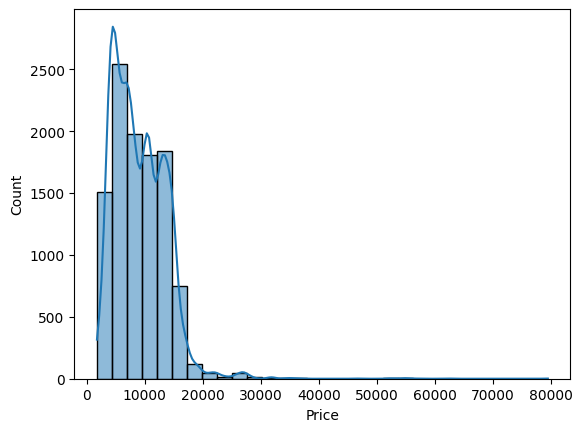

In [213]:
# plotting the distribution of numerical features
sns.histplot(fd['Price'],bins=30,kde=True)
plt.show()

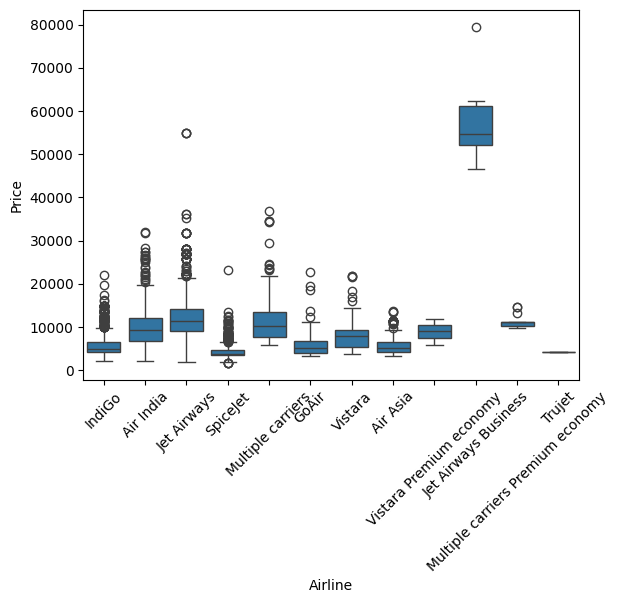

In [214]:
# Box plot for categorical features
sns.boxplot(x='Airline',y='Price',data=fd)
plt.xticks(rotation=45)
plt.show()

### **7. Time-Based Analysis**

In [215]:
# Convert 'Date_of_Journey' to datetime format
fd['Date_of_Journey']=pd.to_datetime(fd['Date_of_Journey'])

C:\Users\Family\AppData\Local\Temp\ipykernel_4760\243597545.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  fd['Date_of_Journey']=pd.to_datetime(fd['Date_of_Journey'])


In [216]:
#Extract Month and date
fd['Month']=fd['Date_of_Journey'].dt.month
fd['Day']=fd['Date_of_Journey'].dt.day

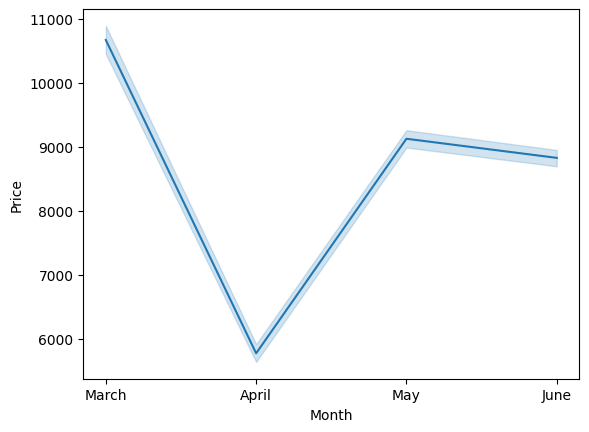

In [217]:
# plotting average price over months
sns.lineplot(x='Month',y='Price',data=fd)
months_names=['March','April','May','June']
plt.xticks(ticks=range(3,7),labels=months_names)
plt.show()

### **8. Correlation Analysis**

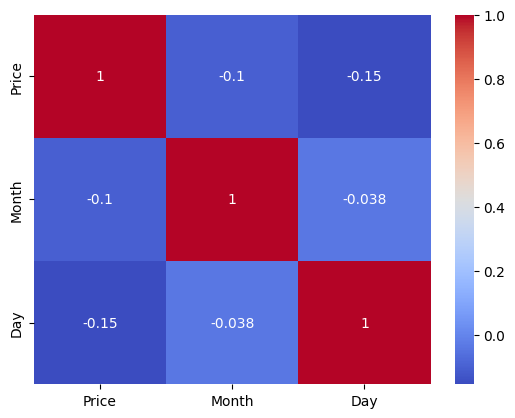

In [218]:
# Checking for correlation betwn Num Variables
fd=fd.select_dtypes(include=['number']).astype(int)
corrln=fd.corr()
sns.heatmap(corrln, annot=True, cmap='coolwarm')
plt.show()

##  Flight Price Dataset EDA Report
 ###  *Introduction :-*
 The dataset **Flight Price** contains records of Airlines travelled from March to June 2019. The dataset includes the following columns:
   1. Airline
   2. Date_of_journey
   3. Source
   4. Designation
   5. Route
   6. Dep_time
   7. Arrival_Time
   8. Duration
   9. Total_Stops
   10. Additional_Info
   11. Price

### *Key Findings*

1. **Dataset Overview:**
   - Number of Rows: [Number]
   - Number of Columns: [Number]

2. **Data Exploration:**
   - Checked the first few rows of the dataset to understand its structure.
   - Obtained summary statistics for a quick overview.

3. **Handling Missing Values:**
   - Explored and addressed missing values using appropriate strategies.

4. **Time-Based Analysis:**
   - Converted 'Date_of_journey' to datetime format.
   - Extracted month and day for additional analysis.
   - Explored average price trends over the months.

5. **Visualization:**
   - Utilized visualizations to understand the distribution of numerical features.
   - Plotted box plots, histograms, and line plots for insights.

6. **Correlation Analysis:**
   - Investigated correlations between numerical variables using a correlation matrix.

7. **Categorical Feature Analysis:**
   - Explored relationships in categorical features using countplots.

### *Conclusion*

- [Briefly summarize key insights gained from the EDA.]
- [Any notable patterns or trends identified.]

### *Recommendations*

- [Suggestions for further analysis or areas to explore.]
- [Potential improvements or optimizations.]
